In [1]:
import pandas as pd
tr = pd.read_csv('../dataset/original/train.csv', escapechar='\\')
tr = tr.sort_values(by=['record_id']).reset_index(drop=True)
tr.head()

,record_id,name,type,address,phone,email,modification,linked_id
0,10000001,"TIANSHENG INDUSTRY AND TRADING CO., LTD.",entity,NaN,3.391448e+11,inquires@TIANSHENG.INDUSTRY.AND.TRADING.CO.LTD.de,original,10000001
1,10000002,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",entity,NaN,1.813704e+10,consulting@zoho.cz,original,10000002
2,10000002-M0,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",entity,NaN,1.813704e+10,NaN,missing,10000002
3,10000002-M1,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",entity,NaN,NaN,NaN,missing,10000002
4,10000004,"SKY-BLUE GIFTS & TOYS CO., LTD.",entity,NaN,NaN,NaN,original,10000004


In [2]:
tr.tail(50)

,record_id,name,type,address,phone,email,modification,linked_id
691390,15001801-M0,Clive Khulubuse Zuma,officer,NaN,4.918253e+10,NaN,missing,15001801
691391,15001801-M1,Clive Khulubuse Zuma,officer,NaN,4.918253e+10,NaN,missing,15001801
691392,15001801-T0,Clive Khulubuse Zuma,officer,NaN,4.918253e+10,NaN,typo,15001801
691393,15001902,Hasan Nawaz Sharif,officer,NaN,3.345135e+11,NaN,original,15001902
691394,15002201,Mohammad Mustafa,officer,NaN,NaN,MohammadMustafa@icloud.ch,original,15002201
691395,15002201-M0,Mohammad Mustafa,officer,NaN,NaN,NaN,missing,15002201
691396,15002201-M1,Mohammad Mustafa,officer,NaN,NaN,MohammadMustafa@icloud.ch,missing,15002201
691397,15002201-M2,Mohammad Mustafa,officer,NaN,NaN,NaN,missing,15002201
691398,15002501,José Maria Botelho de Vasconcelos,officer,NaN,3.918951e+09,NaN,original,15002501
691399,15002701,Mauricio Macri,officer,NaN,4.173633e+12,MauricioMacri@zoho.gov,original,15002701


In [3]:
from tqdm.auto import tqdm
def case_typo(df_test):
    df_test = df_test.sort_values(by=['record_id']).reset_index(drop=True)
    feature = df_test[['record_id','name']]
    feature.name = feature.name.astype(str)
    feature['case_typo'] = [check_string_words(s) for s in tqdm(list(feature.name))]
    final_feature = feature[['record_id','case_typo']]
    return final_feature

def check_string_words(string):
    string = string.replace('-',' ')
    str_strip = string.split(' ')
    errors = []
    for s in str_strip:
        if s.islower() or s.isupper() or s.istitle():
            pass
        else:
            return 1
    return 0

In [4]:
feature = case_typo(tr)

feature.head()

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,record_id,case_typo
0,10000001,0
1,10000002,0
2,10000002-M0,0
3,10000002-M1,0
4,10000004,1


In [5]:
feature['case_typo'] = ['typo' if x == 1 else 'non_typo' for x in feature.case_typo ]

feature.head()

,record_id,case_typo
0,10000001,non_typo
1,10000002,non_typo
2,10000002-M0,non_typo
3,10000002-M1,non_typo
4,10000004,typo


In [6]:
pr = 0
for o,f in tqdm(zip(tr.modification, feature.case_typo)):
    if o == f:
        pr += 1

In [7]:
# questo è il numero di volte che io dico che c'è un typo su quante volte c'è un typo
# da considerare che i typos sono anche su altre colonne
pr*100/tr[tr.modification=='typo'].shape[0]

45.457190929196514

In [8]:
# questa è quante volte c'è davvero un typo rispetto a quante volte dico che c'è un typo 
pr * 100 / feature[feature.case_typo=='typo'].shape[0]

82.20036548378764

In [9]:
# modified version: instead of controlling each word, check the entire string
def modified_case_typo(df_test):
    df_test = df_test.sort_values(by=['record_id']).reset_index(drop=True)
    feature = df_test[['record_id','name']]
    feature.name = feature.name.astype(str)
    feature['case_typo'] = [check_string(s) for s in tqdm(list(feature.name))]
    final_feature = feature[['record_id','case_typo']]
    return final_feature

def check_string(s):
    if s.islower() or s.isupper() or s.istitle():
        return 0
    else: 
        return 1

In [10]:
modified_feature = modified_case_typo(tr)
modified_feature.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,record_id,case_typo
0,10000001,0
1,10000002,0
2,10000002-M0,0
3,10000002-M1,0
4,10000004,0


In [11]:
modified_feature.loc[691398]

record_id    15002501
case_typo           1
Name: 691398, dtype: object

In [12]:
modified_feature['case_typo'] = ['typo' if x == 1 else 'non_typo' for x in modified_feature.case_typo ]

modified_feature.head()

,record_id,case_typo
0,10000001,non_typo
1,10000002,non_typo
2,10000002-M0,non_typo
3,10000002-M1,non_typo
4,10000004,non_typo


In [13]:
mod_pr = 0
for o,f in tqdm(zip(tr.modification, modified_feature.case_typo)):
    if o == f:
        mod_pr += 1

In [14]:
# questo è il numero di volte che io dico che c'è un typo su quante volte c'è un typo
# da considerare che i typos sono anche su altre colonne
mod_pr*100/tr[tr.modification=='typo'].shape[0]

48.80054179320854

In [15]:
mod_pr  * 100 / feature[feature.case_typo=='typo'].shape[0]

88.24615620126484

In [16]:
same_pr = 0
for o,f in tqdm(zip(feature.case_typo, modified_feature.case_typo)):
    if o == f:
        same_pr += 1

In [17]:
# percentuale di nomi con stessa label
same_pr  * 100 / feature.shape[0]

93.01703690848085

In [18]:
# so... the second seems better!

In [51]:
modification_col = tr.modification.tolist()
modification_col = [1 if x == 'typo' else 0 for x in modification_col]

In [52]:
label_f = feature.case_typo.tolist()
label_f = [1 if x == 'typo' else 0 for x in label_f]

In [60]:
label_mf = modified_feature.case_typo.tolist()
label_mf = [1 if x == 'typo' else 0 for x in label_mf]

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_f, tpr_f, _ = roc_curve(modification_col, label_f)
print('Feature:')
print(f'F/P Rate: {fpr_f[1]:.4f}')
print(f'T/P Rate: {tpr_f[1]:.4f}')

Feature:
F/P Rate: 0.0370
T/P Rate: 0.4546


In [99]:
fpr_mf, tpr_mf, _ = roc_curve(modification_col, label_mf)
print('Modified feature:')
print(f'F/P Rate: {fpr_mf[1]:.4f}')
print(f'T/P Rate: {tpr_mf[1]:.4f}')

Modified feature:
F/P Rate: 0.0499
T/P Rate: 0.4880


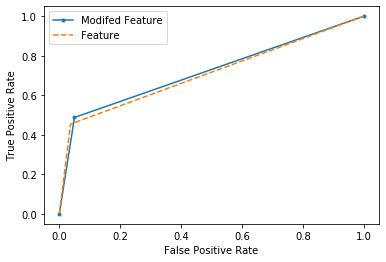

In [115]:
from matplotlib import pyplot
pyplot.plot(fpr_mf, tpr_mf, marker='.', label='Modifed Feature')
pyplot.plot(fpr_f, tpr_f, linestyle='--', label='Feature')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

In [117]:
auc_f = roc_auc_score(modification_col, label_f)
auc_mf = roc_auc_score(modification_col, label_mf)
print(f'Feature AUC: {auc_f:.4f}')
print(f'Modified feature AUC: {auc_mf:.4f}')

Feature AUC: 0.7088
Modified feature AUC: 0.7190


In [119]:
from sklearn.metrics import precision_recall_curve
precision_f, recall_f, _ = precision_recall_curve(modification_col, label_f)
precision_mf, recall_mf, _ = precision_recall_curve(modification_col, label_mf)
print('Feature:')
print(f'Precision: {precision_f[1]:.4f}')
print(f'Recall: {recall_f[1]:.4f}')
print('------------------')
print('Modified feature:')
print(f'Precision: {precision_mf[1]:.4f}')
print(f'Recall: {recall_mf[1]:.4f}')

Feature:
Precision: 0.8220
Recall: 0.4546
------------------
Modified feature:
Precision: 0.7861
Recall: 0.4880


In [120]:
from sklearn.metrics import f1_score
f1_f = f1_score(modification_col, label_f)
f1_mf = f1_score(modification_col, label_mf)
print(f'Feature F1 score: {f1_f:.4f}')
print(f'Modified feature F1 score: {f1_mf:.4f}')

Feature F1 score: 0.5854
Modified feature F1 score: 0.6022


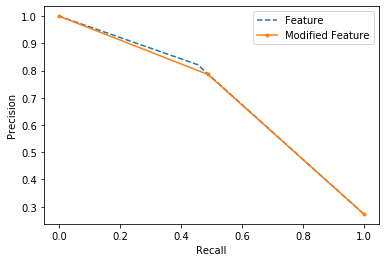

In [121]:
pyplot.plot(recall_f, precision_f, linestyle='--', label='Feature')
pyplot.plot(recall_mf, precision_mf, marker='.', label='Modified Feature')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()